In [1]:
import warnings
warnings.filterwarnings(action='ignore');
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.signal import welch

## 3.3 Description of Problem

피로 수명 계산에서 신호의 두가지 중요한 변수는 싸이클의 범위와 모든 범위에서의 싸이클 수이다. 이 2개의 변수를 알게되면, 피로 또는 수명을 재료의 SN 커브와 Miner Rule을 사용해 계산하기만 하면 된다. 따라서 주어진 PSD로 부터 연속 랜덤 과정을 생성하고 zero crossing과 level crossing을 계산하여 예상되는 수와 첨두치의 간격, 상승 및 하강의 분포를 결정하기 위한 위한 많은 연구가 있었다. [1,2,3,4,5,6] 협대역, staionary, ergodic 램ㄷㅁ 신호의 경우 피로수명을 추정할 수 있는 중요한 연구 결과들이 나왔다[7,8,9]. 하지만, 광대역 신호의 경우 결과는 만족스럽지 못하다. 광대역 신호의 경우 연구가 잘 이루어지지 못한 기본적인 이유가 2개 있다. 첫번째 이유는 계산량 때문이다. six-fold 결합확률밀도를 결정하고, correlation 함수의 determinant 행렬을 계산하는 것은 많은 계산량이 요구된다.[5] 두번째 이유는 더 중요한 이유인데 싸이클이 무엇인지 정의하는 것이 어렵기 때문이다. 협대역 신호의 경우 이러한 문제가 발생하지 않는데, 이는 크기가 일정한 정현파와 같이 신호가 느리게 변하며, Fig. 1.b와 같이 각 첨두치는 평균 밑으로 대칭적으로 일치한다고 가정할 수 있기 때문이다. 하지만 Fig. 3.1.d와 같이 광대역 신호의 경우 첨두치가 인접한 경우, 작은 사이클이 더 크고 손상을 많이 주는 사이클에 숨을 수 있다. 다행히도 지난 수십년간 rainflow counting 방법이 이러한 문제의 해답이라는 여론이 형성되었으며, rainflow counting 방법은 큰 사이클과 작은 사이클을 모두 센다. 본 연구의 목적은 staionary, ergodic 랜덤 과정의 PSD로 부터 rainflow count를 예측하는 방법을 연구하는 것이다.

## 3.3.1 Narrow-Band Case

아래 기술될 결과들에 대한 배경 이론은 참고문헌[1]에서 논의된다. 기본 이론은 S.O. Rice의 고전 논문[4]에서 처음 개발되었으며, J.S Bendat[2,3]이 이후에 피로 문제에 적용하였다.

$x(t)$를 평균이 0인 Gaussian 랜덤 변수라고 하자. 2개의 시점 $t$, $t+\tau$를 고려해 보자. 만약 $x(t)x(t+\tau)<0$이면, Fig. 3.2.와 같이 구간 $(t, t+\tau)$에서 $x(t)$의 zero crossing 수는 홀수여야 한다. 그리고 $\tau$가 작다면 길이 $\tau$의 구간 내에는 1개의 zero crossing 만 있을 것이다. $p(\tau)$를 1개의 zero crossing만 있을 확률이라고 하자.

$$p(\tau)=Prob [x(t)x(t+\tau)<0]\tag{Eq. 3.12}$$

확률함수 $p(\tau)$와 시간이력 $x(t)$의 autocorrelaton(자기상관) 함수인 $R(\tau)$는 다음과 같은 관계를 갖는다.

$$cos[\pi p(\tau)]=\frac{R(\tau)}{R(0)}\tag{Eq. 3.13}$$

## 3.3.2 Expected Fatigue Damage

(생략)

## 3.3.3 The Wide-Band Case

Eq. 3.8.에 정의된 평균이 0이고, 분산이 $\sigma_x^2$인 Stationary Gaussian 과정 $x(t)$를 고려해 보자. 평균이 0이고 분산이 1인 표준화 변수 $z$는 다음과 같다.

$$z=\frac{x}{\sigma_x}$$

첨두치 확률밀도함수 $w(z)$는 첨두치가 $z$와 $z+dz$ 사이에 올 확률이며 다음과 같이 표현된다.[3]

$$w(z)=\frac{c}{\sqrt{2\pi}}e^{-z^2/2c^2}+\gamma ze^{-z^2/2}[1/2 + erf(\gamma z/c)] \tag{Eq. 3.32}$$

여기서 $\gamma$는 irregularity factor이며 Eq. 3.20의 정의와 같다. 그리고,

$$c=\sqrt{1-\gamma^2}$$

$$erf(y)=\frac{1}{\sqrt{2\pi}}\int_0^y e^{-t^2/2dt}$$

$w(z)$의 모양은 irregularity factor $\gamma$에 의해 결정된다. $\gamma$가 1로 가면, 즉, 협대역인 경우, $w(z)$는 다음과 같은 표준 Rayleigh 분포 밀도함수가 된다.

$$w(z)=ze^{-z^2/2}\tag{Eq. 3.33}$$

$\gamma$가 0으로 가면, 단위시간당 예상되는 피크수는 단위시간당 예상되는 zero crossing 수보다 훨씬 많아지며, $w(z)$는 표준 Gaussian 확률밀도함수가 된다. 








$$w(z)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}\tag{Eq. 3.34}$$

협대역의 경우 $w(x)$는 Rayleight 밀도함수로 접근하며, 비록 Rayleight 밀도함수는 양의 $z$ 값에 대해서만 정의되지만, Eq. 3.32의 일반 표현은 모든 $z$ 값에 대해 가능함에 유의하라.

$w(z)$의 일반형태인 Eq. 3.32는 Gaussian 밀도함수와 Rayleight 밀도 함수 사이에 존재하며, Fig 3.4에 무차원 변수 $\gamma=0.99, 0.74, 0.49, 0.21$인 4가지 경우에 대해 z에 대한 함수로 그려져 있다.

하지만, 피크의 확률밀도함수인 $w(z)$를 안다고 해서 광대역 경우에 피로 손상을 추정하는 것이 쉬워지는 것은 아니다. 과정이 광대역이면, 그 과정의 시간이력은 Fig. 3.1.d와 같이 주어지며, Miner's Rule을 사용해 피로 응력 사이클을 어떻게 세야 할지 명확하지 않다. 여기서는 rainflow method가 이러한 문제의 해답을 준다고 가정한다. 왜냐하면 rainflow counting은 히스테리시스 폐루프와 관련된 사이클을 식별할 수 있기 때문이다.

In [2]:
def w(z,r):
    c = np.sqrt(1-r**2);
    return (c/(np.sqrt(2*np.pi)))*np.exp(-(z**2)/(2*c**2))+ r*z*np.exp(-(z**2)/2)*(1/2+(erf((r*z/c)/np.sqrt(2))/2));
# 논문의 erf와 python erf의 수식이 달라 wiki를 참고해 수정하였음.

In [3]:
z = np.linspace(-4,4,1000);

In [4]:
w1,w2,w3,w4 = np.zeros(1000),np.zeros(1000),np.zeros(1000),np.zeros(1000);
for i in range(1000):
    w1[i] = w(z[i],r=0.99);
    w2[i] = w(z[i],r=0.74);
    w3[i] = w(z[i],r=0.49);
    w4[i] = w(z[i],r=0.21);

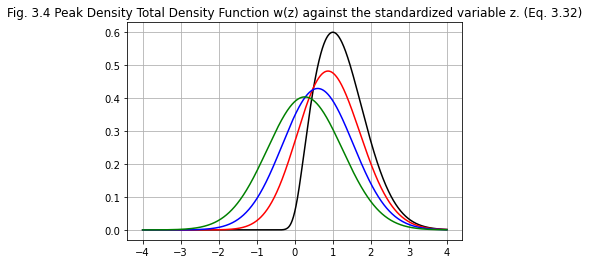

In [5]:
plt.plot(z,w1,'k-');
plt.plot(z,w2,'r-');
plt.plot(z,w3,'b-');
plt.plot(z,w4,'g-');
plt.grid(); plt.title('Fig. 3.4 Peak Density Total Density Function w(z) against the standardized variable z. (Eq. 3.32)');

rainflow count 알고리즘의 복잡성 때문에 PSD $G(w)$에서 rainflow 분포를 유도하는 것은 매우 어려운 일일 것이다. 하지만, 몬테카를로 접근법을 사용하면 FFT 방법을 사용해 $G(w)$로부터 샘플 응력 시간이력 $s(t)$를 생성할 수 있다. 그려면, rainflow 알고리즘을 $s(t)$에 적용해 사이클 수와 rainflow로 센 범위들에 대한 확률밀도 함수를 결정할 수 있다. 이를 사용하면 상수 $K$와 $b$를 갖는 주어진 재료에 대하여 Eq. 3.27을 사용해 피로손상을 계산할 수 있다. 이와 유사한 접근법은 Wirsching 외[10,11]가 사용했으며, 주어진 PSD $G(w)$로 랜덤 샘플 응력 시간이력 $s(t)$를 생성하고, rainflow로 추출한 범위의 확률밀도 함수를 결정하고, 이로 피로 손상을 계산하는데 적용했다. 그 논문들 중 첫째 논문[10]에는, 응력 시간이력 $s(t)$의 rainflow 범위를 Weibull 분포함수를 사용해 모델링할 수 있는 가능성에 대해 조사하였다. 하지만, 시뮬레이션 결과 $s(t)$의 밀도는 일반적으로 Weibull이 아니다. 그럼에도 불구하고, Weibull로 가정한 경우의 범위 밀도 함수로 계싼한 피로손상과 개별 rainflow 사이클의 합으로 계산한 피로 손상은 비교되었다. Weibull 분포에 대하여 irregularity factor $\gamma$와 SN 커브의 기울기인 $b$에 대한 함수인 correction factor를 제안하였다.

두번째 논문[11]에서는, rainflow 범위의 확률밀도함수를 결정하기 위한 시도는 없었따. 대신, 광대역 stationary 과정에서의 피로손상을 동등한 협대역 과정의 피로손상과 비교하였다. 그리고 $\gamma$와 $b$에 대한 함수인 correction factor를 제안하였으며, 광대역 경우와 동일한 rms 값 및 예상 zero crossing 수를 갖는 Rayleight 분포가 사용되었다. Correction factor C는 랜덤 변수로 간주되었으며 Eq. 3.35와 같다.

$$C(b,\gamma)=0.926-0.033b+(0.074+0.033b)(1-\sqrt{1-\gamma^2})^{1.587b-2.323}\tag{Eq. 3.35}$$

## 3.4 Description of the Simulation

## 3.4.1 General Procedure

(i) 주어진 PSD $G(w)$에 대하여, 0차, 2차, 4차 모멘트를 Eq. 3.7을 사용해 계산한다. 그리고 rms 값 즉 표준편차를 Eq. 3.8을 사용해 계싼하고, 예상 zero crossing 수를 Eq. 3.15로 계산하고, 예상 Peak 수를 Eq. 3.17로 계산하고, irregularity factor를 Eq. 3.20으로 계산한다.

(ii) 아래의 IDFT를 사용해 $G(w)$에서 샘플 응력 시간이력 $s(t)$를 생성한다.

$$x(k\Delta t)=\frac{\Delta w}{2\pi}\sum_{n=-N/2}^{N/2-1}F(jn\Delta w)e^{j2\pi k n/N}\tag{Eq. 3.36}$$

where

$k=0,1,\dots,N-1$

$F(jn\Delta w)=\sqrt{G(n\Delta w)}e^{j \Phi n},\;\;n=1,N/2-1$

$\Phi_n$: 구간 $[-\pi,\pi]$에서 균일하게 분포된 랜덤 Phase angle

$N$은 전체 샘플 수이며, $\Delta w$ 및 $\Delta t$와 함께 다음과 같은 관계를 갖는다.

$$N\Delta w \Delta t = 2\pi \tag{Eq. 3.37}$$

$s(k\Delta t)$는 시간에 대한 실수 함수이기 때문에, 스펙트럼 $F(jn\Delta w)$는 complex conjugate 대칭을 보여야 한다.

$$F(jn\Delta w)=F^*(-jn\Delta w),\;\;n=1,2,\dots,(N/2-1)\tag{Eq. 3.38}$$

$F(jn\Delta w)$에 대한 또 다른 제약 사항은 다음과 같다.

$$F(0)=0 \tag{Eq. 3.39}$$

이는 시간이력 $s(k\Delta t)$가 0의 평균을 갖는 조건이다.

(iii) 응력 시간이력 $s(k\Delta t)$에서 rms 값을 다시 계산한다.

$$\sigma_s^2=\frac{1}{N}\sum_{k=0}^{N-1}s(k\Delta t)^2 \tag{Eq. 3.40}$$

그리고 zero crossing 수, 피크 수를 세고, irregularity factor를 결정한다. 계싼한 값들을 (i)단계에서 계산된 결과와 비교한다.

(iv) (ii), (iii)단계를 20번 반복하여 충분히 긴 시간이력을 얻고, 이를 하나의 응력 시간이력으로 묶는다. 그리고 이 묶음에 대한 크기 확률밀도 함수를 결정한다.

(v) 응력시간이력 묶음을 피크와 교차점에 대한 표현으로 수정한다. 그리고 피크와 교차점에 대한 확률밀도함수를 결정한다.

(vi) 연속된 피크와 교차점 사이의 겨리를 'ordinary range'로 정의한다. ordinary range를 추출하고, rainflow counting 방법을 피크와 교차점에 적용하여 rainflow range를 추출한다. ordinary range의 확률밀도함수와 rainflow range의 확률밀도함수를 결정한다. 

(vii) rainflow로 센 범위를 사용해 다양한 $b$값에 대한 예상 피로손상을 계산한다.

## 3.4.2 Simulation

상기 기술된 절차는 RT-11 컴퓨터 시스템을 사용해 수행되었다. 1024개 점의 FFT를 사용하여 주어진 PSD로 부터 샘플 응력 시간이력을 얻었다.

(i) 총 70개의 다른 PSD를 사용했다. 비교를 편하게 하기 위해 Eq. 3.8, Eq. 3.17를 사용하여 rms 값과 expected rate or peak가 같도록 PSD를 선정했다. expected rate of peak는 임의로 108 peak/block으로 선정했으며, 이는 대략 연속된 피크와 교차점 사이에 5개의 점을 가져 부드러운 응력 시간이력을 생성할 수 있게 해준다.

2가지 종류의 PSD를 사용했으며 Fig. 3.5에 나타나 있다. 사각 bimodal PSD(Fig. 3.5-a)를 많이 사용했는데 이는 크기와 주파수 범위를 조절하여 동일한 rms 값 $\sigma_x$, 동일한 expected rate of peak $\mu$를 갖는 넓은 범위의 irregularity factor $\gamma$를 구현하기 쉽기 때문이다. 부드러운 PSD(Fig 3.5.b)는 2개의 Band Pass Filter를 조함한 것이며, 각 필터는 다음과 같은 형태를 갖는다.

$$|G_i(w)|^{1/2}=\frac{A}{\sqrt{1+(f-f_i)^2/Q^2}}\tag{Eq. 3.41}$$

In [6]:
# Smooth PSD
def Gs(f,A1,f1,Q1,A2,f2,Q2,fc):
    out1 = np.zeros(len(f)); out2 = np.zeros(len(f));
    for i in range(len(f)):
        if f[i] <= fc:
            out1[i] = A1/np.sqrt(1+((f1-f[i])**2)/(Q1**2));
            out2[i] = A2/np.sqrt(1+((f2-f[i])**2)/(Q2**2));
        else:
            out1[i] = 0;
            out2[i] = 0;
    out = out1 + out2;
    return out**2

In [7]:
# Rectangular PSD
def Gr(f,f1,p1,f2,p2,A1,A2):
    out = np.zeros(len(f));
    for i in range(len(f)):
        if f[i] >= f1 and f[i] <= p1:
            out[i] = A1
        elif f[i] >= f2 and f[i] <= p2:
            out[i] = A2;
    return out**2;

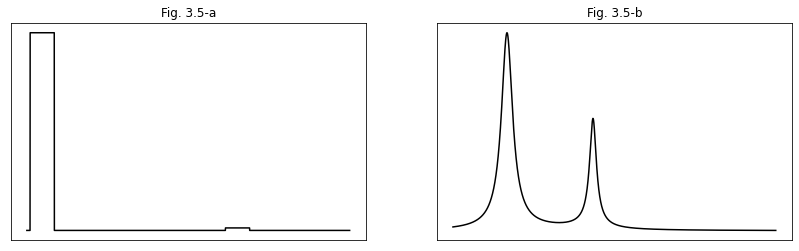

In [8]:
plt.figure(figsize=(14,4));
plt.subplot(121);
A1 = 31800; f1 = 2; p1 = 17; A2 = 3572; f2 = 123; p2 = 138;
f = np.linspace(0,200,10000);
gr = Gr(f,f1,p1,f2,p2,A1,A2);
plt.plot(f,gr,'k-'); plt.xticks([]); plt.yticks([]);
plt.title('Fig. 3.5-a');

plt.subplot(122);
A1 = 26333; f1 = 40.5; Q1=5; A2 = 18444; f2 = 105; Q2 = 3; fc = 242;
f = np.linspace(0,242,10000);
gs = Gs(f,A1,f1,Q1,A2,f2,Q2,fc);
plt.plot(f,gs,'k-'); plt.xticks([]); plt.yticks([]); plt.title('Fig. 3.5-b');

초기에는 14개의 부드러운 PSD와 14개의 사각 PSD를 사용했으며, 0.16 ~ 0.99 사이의 irregularity factor갖도록 했다. 동일한 $\sigma_x$, $\mu$, $\gamma$를 갖는 다양한 모양의 PSD를 찾을 수 있다. Eq. 3.7, 8, 16, 17, 20에 대한 결과 동일한 $\sigma_x$, $\mu$, $\gamma$를 갖기 위해서는 PSD의 0차, 2차, 4차 모멘트가 같아야 한다.

실제 과정인 $x(t)$에 대당하는 PSD의 1차 모멘트는 0이어야 하지만, 다음과 같이 single-sided 1차 모멘트를 정의할 수 있다.

$$m_x=\frac{1}{\pi}\int_0^\infty wG(w)dw\tag{Eq. 3.42}$$

그러면 $m_x/m_0$는 PSD의 평균주파수로 고려할 수 있다.

Fig 3.5에서 동일한 $\sigma_x$, $\mu$, $\gamma$를 갖는 스펙트럼 변수들을 고정하기 위한 초기 시도 중에 PSD의 평균 주파수와 해당 시간이력으로 계산한 피로 손상이 연관이 있음이 확인되었다. 이러한 관계를 더 확인해 보기 위해 42개의 추가 PSD를 선정하였다. 이 PSD 들은 7개의 스펙트럼의 6개 그룹으로 구성되며, 한 그룹의 각 스펙트럼은 동일한 $\sigma_x$, $\mu$, $\gamma$를 갖지만, $m_X$ 값은 다르다.

각 스펙트럼의 평균주파수는 expected rate of peak로 정규화 하여 무차원 양인 $X_m$를 만들었다.

$$X_m=\frac{m_x}{m_0 \mu}\tag{Eq. 3.43}$$

이는 PSD의 상대 평균으로 고려할 수 있다.

본 연구에서 사용된 70개의 PSD에 대하여 Fig. 3.5와 Eq. 3.41의 스펙트럼 변수들이 Table 3.1에 기술되어 있다. Table 3.1의 마지막 2개 열은 해당 상대 평균 및 irregularity factor를 의미한다. Fig. 3.6.a는 Table 3.1, Sp-2의 전형적인 unimodal smooth spectrum을 보여주며, Fig. 3.6.b는 Sp-3의 bimodal spectrum을 보여준다. 모든 PSD는 동일한 rms 값인 176.78을 가지며, 대략 유사한 expected rate of peak 값인 108.5 peak/block을 갖는다.

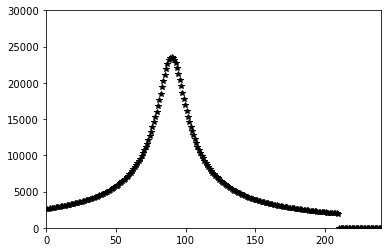

In [9]:
# Fig. 3.6.a Plot of Sp-2 in Table 3.1
A1 = 23580; f1 = 90; Q1 = 10; fc = 210; xm=0.839; r=0.869; A2 = 0; f2 = 0; Q2 = 0;
f = np.linspace(0,1000,1024);
g2 = Gs(f,A1,f1,Q1,A2,f2,Q2,fc);
plt.plot(f,np.sqrt(g2),'k*'); plt.xlim(0,240); plt.ylim(0,30000);

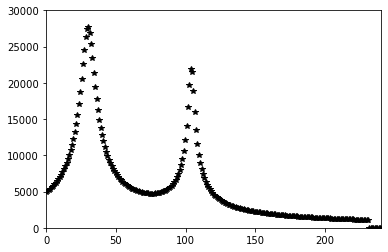

In [10]:
# Fig. 3.6.b Plot of Sp-7 in Table 3.1
A1 = 27019; f1 = 30; Q1 = 5; A2=20264; f2=104; Q2=2.5; fc = 231; xm=0.493; r=0.600;
f = np.linspace(0,1000,1024);
g7 = Gs(f,A1,f1,Q1,A2,f2,Q2,fc);
plt.plot(f,np.sqrt(g7),'k*'); plt.xlim(0,240); plt.ylim(0,30000);

(ii) 3.4.1.ii에 기술된 방법으로 샘플 시간이력 $s(t)$를 생성하였다.Fig. 3.7.(a), (b), (c)는 3개의 1024 점을 갖는 샘플 시간이력을 보여주며 스펙트럼 17, 24, 28에 대하여 irregularity factor 0.99, 0.74, 0.27을 갖는다.

In [11]:
def log_interp(x,x_spec,y_spec):
    return 10**np.interp(np.log10(x),np.log10(x_spec),np.log10(y_spec));

In [12]:
def psd2th(freq,psd):  # IFFT method from Dirlik papar
    
    Nt = 1024; Nf = 512;
    fmax = max(freq); df = fmax/Nf;
    dt = 1/Nt/df; tmax = Nt*dt
    fi = np.linspace(df,fmax,Nf);
    G = log_interp(fi,freq,psd);
    F = np.zeros(Nt+1,'complex');
    Phi = np.random.uniform(low=-np.pi,high=np.pi,size=Nf);
    F[Nf+1:] = np.sqrt(G)*np.exp(1j*Phi)
    F[:Nf] = np.conjugate(np.flip(F[Nf+1:]))
    s = np.zeros(20*Nt);
    n = np.arange(-Nf,Nf+1);
    for i in range(20):
        for k in range(Nt):
            s[i*Nt+k] = df*np.sum(F*np.exp(1j*2*np.pi*k*n/Nt))
            
    ti = np.arange(20*Nt)*dt
    
    # grms 맞추는 과정은 내가 추가
    grms_spec = np.sqrt(np.trapz(G,fi));
    grms_syn = np.std(s)
    s *= grms_spec/grms_syn;
    
    return ti,s

spec grms = 743.52  syn grms = 123591.61


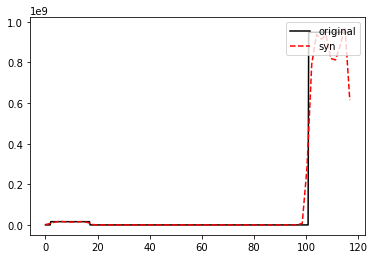

In [13]:
# Fig 3.7.(a) SP-28 TH
A1 = 4000; f1 = 2; p1 = 17; A2 = 30801; f2 = 101; p2 = 117; xm = 0.981; r = 0.988;
def G1(f):
    A1 = 4000; f1 = 2; p1 = 17; A2 = 30801; f2 = 101; p2 = 117; xm = 0.981; r = 0.988;
    return Gr(f,f1,p1,f2,p2,A1,A2);
Nt = 1024; Nf = 512; fmax = p2; fs = 2*fmax; dt = 1/fs; tmax = dt*Nt; df = 1/(Nt*dt); 
freq1= np.arange(Nf)*df; psd1 = G1(freq1); grms_spec1 = np.sqrt(A1*(p1-f1)+A2*(p2-f2));
# PSD1
time,th = psd2th(freq1,psd1);
# grms 비교
grms_syn = np.std(th);
print("spec grms = %.2f  syn grms = %.2f"%(grms_spec1,grms_syn));
# PSD Check
freq_syn,psd_syn = welch(th,fs = max(freq1)*2,nperseg=2**7);
plt.plot(freq1,psd1,'k-',label='original');
plt.plot(freq_syn,psd_syn,'r--',label='syn'); plt.legend(loc='upper right');
time1 = time; th1 = th;

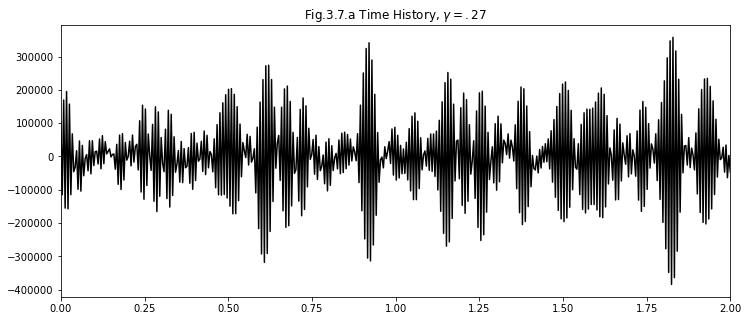

In [14]:
plt.figure(figsize=(12,5)); plt.plot(time,th,'k-'); plt.title('Fig.3.7.a Time History, $\gamma=.27$');
plt.xlim(0,2);

spec grms = 1026.87  syn grms = 124890.17


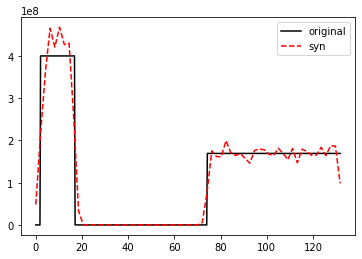

In [15]:
# Fig 3.7.(b) SP-24 TH
A1 = 20000; f1 = 2; p1 = 17; A2 = 13008; f2 = 74; p2 = 132; xm = 0.604; r = 0.746;
def G1(f):
    A1 = 20000; f1 = 2; p1 = 17; A2 = 13008; f2 = 74; p2 = 132; xm = 0.604; r = 0.746;
    return Gr(f,f1,p1,f2,p2,A1,A2);
Nt = 1024; Nf = 512; fmax = p2; fs = 2*fmax; dt = 1/fs; tmax = dt*Nt; df = 1/(Nt*dt); 
freq2= np.arange(Nf)*df; psd2 = G1(freq2); grms_spec1 = np.sqrt(A1*(p1-f1)+A2*(p2-f2));
# PSD2
time,th = psd2th(freq2,psd2);
# grms 비교
grms_syn = np.std(th);
print("spec grms = %.2f  syn grms = %.2f"%(grms_spec1,grms_syn));
# PSD Check
freq_syn,psd_syn = welch(th,fs = max(freq2)*2,nperseg=2**7);
plt.plot(freq2,psd2,'k-',label='original');
plt.plot(freq_syn,psd_syn,'r--',label='syn'); plt.legend(loc='upper right');
time2 = time; th2 = th;

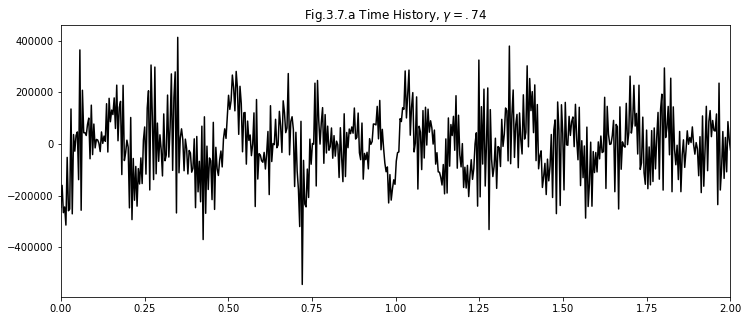

In [16]:
plt.figure(figsize=(12,5)); plt.plot(time,th,'k-'); plt.title('Fig.3.7.a Time History, $\gamma=.74$');
plt.xlim(0,2);

spec grms = 812.88  syn grms = 122761.96


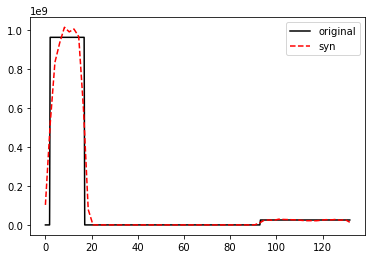

In [17]:
# Fig 3.7.(c) SP-17 TH
A1 = 31000; f1 = 2; p1 = 17; A2 = 5020; f2 = 93; p2 = 132; xm = 0.137; r = 0.270;
def G1(f):
    A1 = 31000; f1 = 2; p1 = 17; A2 = 5020; f2 = 93; p2 = 132; xm = 0.137; r = 0.270;
    return Gr(f,f1,p1,f2,p2,A1,A2);
Nt = 1024; Nf = 512; fmax = p2; fs = 2*fmax; dt = 1/fs; tmax = dt*Nt; df = 1/(Nt*dt); 
freq3= np.arange(Nf)*df; psd3 = G1(freq3); grms_spec1 = np.sqrt(A1*(p1-f1)+A2*(p2-f2));
# PSD3
time,th = psd2th(freq3,psd3);
# grms 비교
grms_syn = np.std(th);
print("spec grms = %.2f  syn grms = %.2f"%(grms_spec1,grms_syn));
# PSD Check
freq_syn,psd_syn = welch(th,fs = max(freq3)*2,nperseg=2**7);
plt.plot(freq3,psd3,'k-',label='original');
plt.plot(freq_syn,psd_syn,'r--',label='syn'); plt.legend(loc='upper right');
time3 = time; th3 = th;

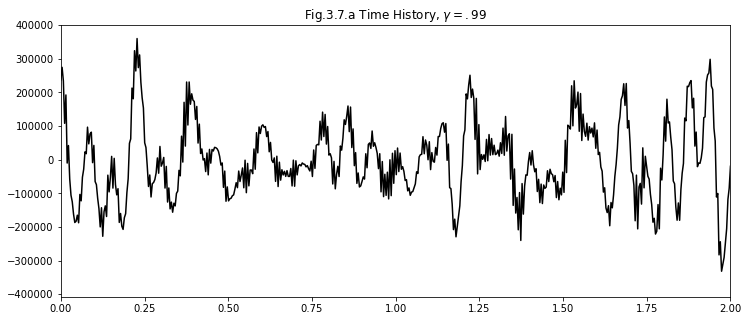

In [18]:
plt.figure(figsize=(12,5)); plt.plot(time,th,'k-'); plt.title('Fig.3.7.a Time History, $\gamma=.99$');
plt.xlim(0,2);

(iii) 각 샘플 시간이력 $s(t)$의 평균 및 rms 값을 계산하였다. 계산 결과 예상한대로 0과 176.7의 값을 가졌다.

In [19]:
print(np.mean(th1)); print(np.mean(th2)); print(np.mean(th3));
print(np.std(th1)); print(np.std(th2)); print(np.std(th3));

7.63435537010082e-10
1.7507773009128869e-10
1.6370904631912708e-11
123591.61493968744
124890.17226248012
122761.95807874498


(iv) (ii)단계를 20회 반복하여 샘플 응력시간이력을 충분히 길게 만들었으며, 총 20480 샘플 수를 갖도록 했다. 이를 1개의 블록이라고 부른다. 각 블록에 대하여 zero crossing 수와 피크 수를 세고 비교한 결과 (i)에서 비교한 결과와 1~5% 오차 내에 들어옴을 확인했다. 따라서 zero crossing과 피크 수는 결정론적이라고 가정한다. Fig. 3.8은 한 블록의 크기 확률밀도함수를 보여주며 평균이 0이고 분산이 178.78인 Gaussian 분포와 비교한 것이다. irregularity factor와 relative mean과 상관없이 모든 크기 확률 밀도 함수는 Gaussian 밀도 모양을 따랐다. 

In [20]:
len(th)

20480

In [44]:
def ppc(th):  # Positive Peak Count
    cnt = 0;
    dth = np.diff(th);
    for i in range(len(dth)-1):    
        if dth[i]*dth[i+1] < 0 and dth[i] > dth [i+1]:
            cnt += 1;
    return cnt;

In [45]:
def M(freq,psd,n):
    psd *= freq**n;
    return np.trapz(psd,freq);

In [46]:
def Ep(freq,psd):
    def M(freq,psd,n):
        psd1 = psd * freq**n;
        return np.trapz(psd1,freq);
    M2 = M(freq,psd,2); M4 = M(freq,psd,4);
    return np.sqrt(M4/M2);

In [47]:
p1 = ppc(th1)/max(time1); Ep1 = Ep(freq1,psd1); print("%5.f\t%5.f"%(p1,Ep1));
p2 = ppc(th2)/max(time2); Ep2 = Ep(freq2,psd2); print("%5.f\t%5.f"%(p2,Ep2));
p3 = ppc(th3)/max(time3); Ep3 = Ep(freq3,psd3); print("%5.f\t%5.f"%(p3,Ep3));

  107	  109
  101	  109
   89	  109


In [48]:
def zuc(th):   # zero up-crossing
    cnt = 0;
    for i in range(len(th)-1):
        if th[i]*th[i+1] < 0 and th[i] < th[i+1]:
            cnt += 1;
    return cnt

In [49]:
def E0p(freq,psd):
    def M(freq,psd,n):
        psd1 = psd * freq**n;
        return np.trapz(psd1,freq);
    M0 = M(freq,psd,0); M2 = M(freq,psd,2);
    return np.sqrt(M2/M0);

In [50]:
z1 = zuc(th1)/max(time1); print("%5.f\t%5.f"%(z1,E0p(freq1,psd1)));
z2 = zuc(th2)/max(time2); print("%5.f\t%5.f"%(z2,E0p(freq2,psd2)));
z3 = zuc(th3)/max(time3); print("%5.f\t%5.f"%(z3,E0p(freq3,psd3)));

  105	  108
   68	   82
   23	   30


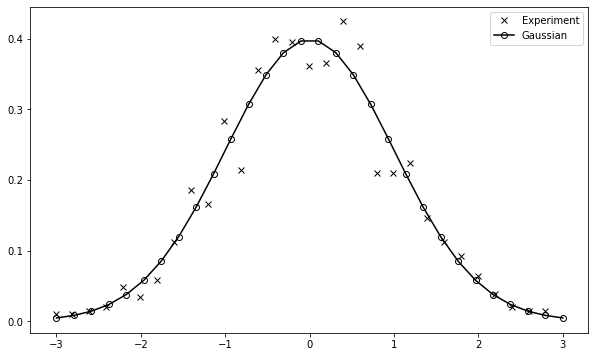

In [123]:
from scipy import stats
plt.figure(figsize=(10,6));
num_bins = 30;
a = np.histogram(th1/np.std(th1),bins=num_bins,normed=True);
x = (a[1][1:] + a[1][:-1]) / 2; y = a[0];
plt.plot(x,y,'kx',label='Experiment');
y = np.linspace(-3, 3, num_bins)
bin_width = (x.max() - x.min()) / num_bins
plt.plot(y, stats.norm.pdf(y),'ko-',markerfacecolor='none',label='Gaussian'); plt.legend(loc='upper right');

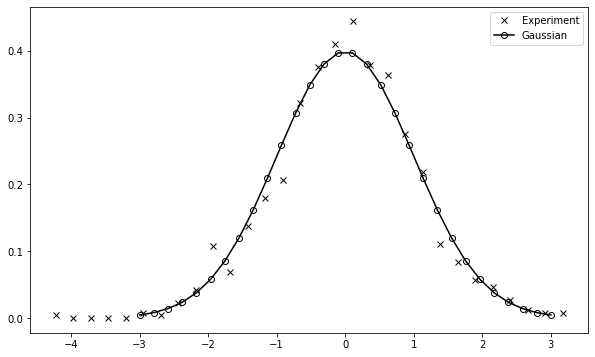

In [124]:
plt.figure(figsize=(10,6));
num_bins = 30;
a = np.histogram(th2/np.std(th2),bins=num_bins,normed=True);
x = (a[1][1:] + a[1][:-1]) / 2; y = a[0];
plt.plot(x,y,'kx',label='Experiment');
y = np.linspace(-3, 3, num_bins)
bin_width = (x.max() - x.min()) / num_bins
plt.plot(y, stats.norm.pdf(y),'ko-',markerfacecolor='none',label='Gaussian'); plt.legend(loc='upper right');

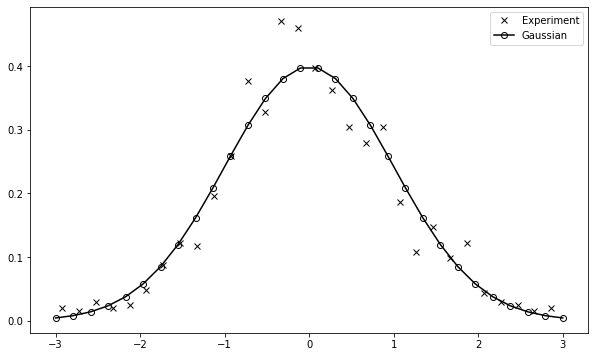

In [125]:
plt.figure(figsize=(10,6));
num_bins = 30;
a = np.histogram(th3/np.std(th3),bins=num_bins,normed=True);
x = (a[1][1:] + a[1][:-1]) / 2; y = a[0];
plt.plot(x,y,'kx',label='Experiment');
y = np.linspace(-3, 3, num_bins)
bin_width = (x.max() - x.min()) / num_bins
plt.plot(y, stats.norm.pdf(y),'ko-',markerfacecolor='none',label='Gaussian'); plt.legend(loc='upper right');